# Pymaceuticals Inc.
---

### Analysis
#### Approach:
- Following find the analysis of the effacy of the drug, Capomulin as a treatment for squamous cell carcinoma (SCC) the analysis included 248 of 249 mice subjects reviewed. One mouse was excluded due to suspect data.  
#### Findings:
- There is a high correlation between tumor size and mouse weight, as evidenced by the correlation and regression section of the analysis.  The Pearson correlation coefficient is a strong 0.84

 

In [145]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_results_complete = pd.merge(study_results, mouse_metadata, how='left', on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
study_results_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [146]:
# Checking the number of mice.
mouseCount = len(pd.unique(study_results_complete['Mouse ID']))
mouseCount

249

In [147]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
DupMice_df=study_results_complete[study_results_complete.duplicated(['Mouse ID', 'Timepoint'])]
DupMice_df
# array(['g989'], dtype=object)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [148]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicate_df = study_results_complete[study_results_complete['Mouse ID']=='g989']
Duplicate_df 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [149]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=study_results_complete[study_results_complete['Mouse ID']!='g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [150]:
# Checking the number of mice in the clean DataFrame.
mouseCount = len(pd.unique(clean_df['Mouse ID']))
mouseCount

248

## Summary Statistics

In [151]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
SummaryStats_df = pd.DataFrame({'Mean Tumor Volume': clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean(),
                               'Median Tumor Volume': clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median(),
                               'Tumor Volume Variance': clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var(),
                               'Tumor Volume Std. Dev.': clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std(),
                               'Tumor Volume Std. Err.':clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()})

SummaryStats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [152]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
SummaryStats=pd.pivot_table(clean_df, values= 'Tumor Volume (mm3)',
                            index='Drug Regimen',aggfunc={'Tumor Volume (mm3)': ['mean',
                                                          'median',
                                                          'var',
                                                          'std',
                                                          'sem']})
# Using the aggregation method, produce the same summary statistics in a single line
SummaryStats = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
SummaryStats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

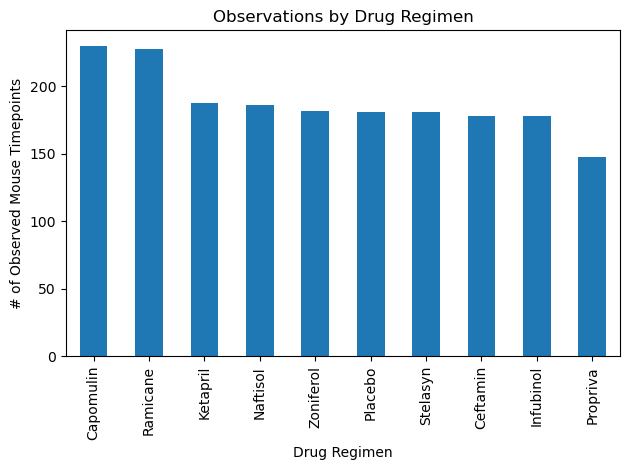

In [153]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_data=clean_df.value_counts('Drug Regimen')
bar_data.plot(kind='bar', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints', title = 'Observations by Drug Regimen')
plt.tight_layout()
plt.show()

TypeError: 'str' object is not callable

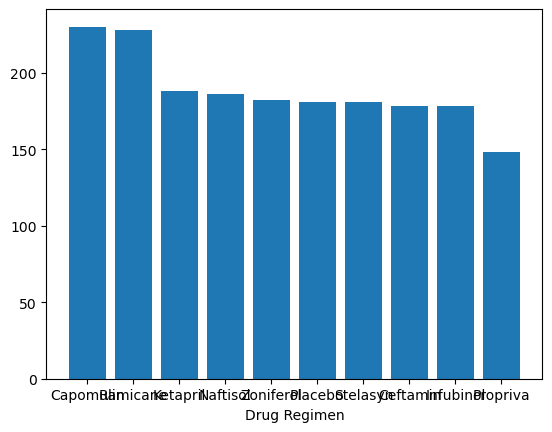

In [154]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(bar_data.index, bar_data, align='center')
plt.xlabel('Drug Regimen')
plt.title('Observations by Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()

<Axes: ylabel='Sex'>

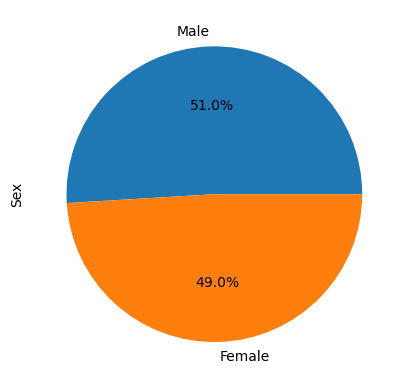

In [155]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_data=clean_df.value_counts('Sex')
pie_data.plot(kind='pie',ylabel='Sex', autopct='%1.1f%%')

Text(0, 0.5, 'Sex')

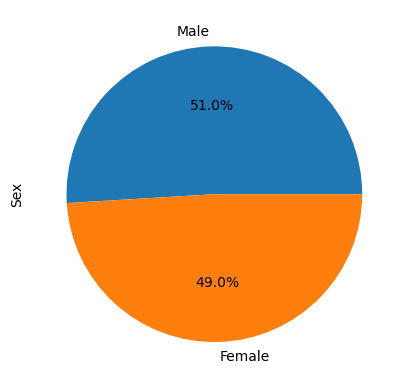

In [156]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_data, autopct='%1.1f%%', labels=pie_data.index)
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [157]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments=['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']
four_regime_data_df = clean_df.loc[clean_df["Drug Regimen"].isin(treatments),:].copy()

# Start by getting the last (greatest) timepoint for each mouse
max_mouse_timepoint=four_regime_data_df.groupby(['Mouse ID'])['Timepoint'].max()
max_mouse_keys = max_mouse_timepoint.keys()
max_mouse_timepoint_df=pd.DataFrame({'Max_Mouse':max_mouse_timepoint})


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
four_regime_data_df=four_regime_data_df.set_index('Mouse ID')
last_tumor_df=pd.merge(max_mouse_timepoint_df,four_regime_data_df,how ='left', left_on=('Mouse ID','Max_Mouse'), 
                       right_on=('Mouse ID','Timepoint')).copy()


In [158]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

this_treatment_list=[]

for treatment in treatments:
    outliers=[]
    this_treatment_list.append(last_tumor_df.loc[(last_tumor_df['Drug Regimen'] == treatment),['Drug Regimen', 'Tumor Volume (mm3)']])
    quartiles = last_tumor_df.loc[(last_tumor_df['Drug Regimen'] == treatment), 'Tumor Volume (mm3)'].quantile([.25,.5,.75])
    
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)
   
    outliers.append(last_tumor_df.loc[(last_tumor_df['Drug Regimen']==treatment ) & 
                                      ((last_tumor_df['Tumor Volume (mm3)'] <= lower_bound)
                                       |(last_tumor_df['Tumor Volume (mm3)'] >= upper_bound))]['Tumor Volume (mm3)'])
    print(f'{treatment}\'s potential outliers:{outliers}')
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers:[Series([], Name: Tumor Volume (mm3), dtype: float64)]
Ramicane's potential outliers:[Series([], Name: Tumor Volume (mm3), dtype: float64)]
Infubinol's potential outliers:[Mouse ID
c326    36.321346
Name: Tumor Volume (mm3), dtype: float64]
Ceftamin's potential outliers:[Series([], Name: Tumor Volume (mm3), dtype: float64)]


In [159]:
# build a two dimensional list for plotting
plot_data=[]
for treatment in range(len(treatments)):
    plot_data.append(this_treatment_list[treatment]['Tumor Volume (mm3)'])


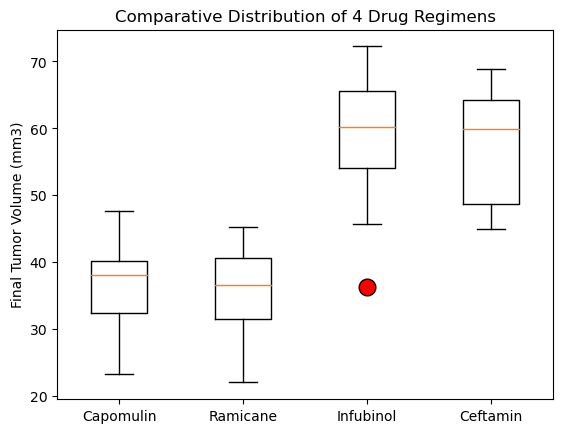

In [160]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()


ax1.set(ylabel='Final Tumor Volume (mm3)')
outlier_format=dict(marker='o', markerfacecolor='r', markersize = 12)
ax1.set_title('Comparative Distribution of 4 Drug Regimens')
plt.boxplot(plot_data, labels=treatments, flierprops=outlier_format )

plt.show()


## Line and Scatter Plots

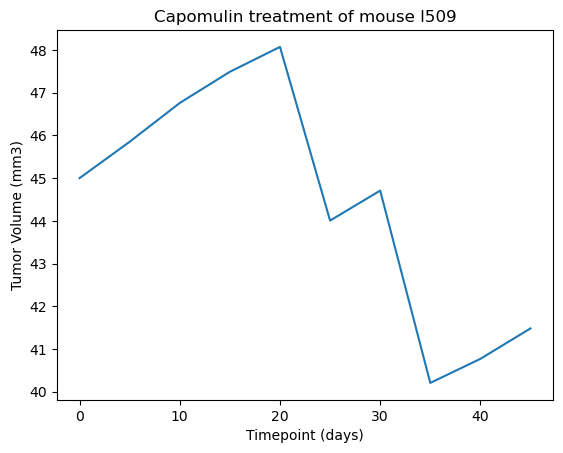

In [161]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot_data=clean_df.loc[clean_df['Mouse ID']=='l509'][['Tumor Volume (mm3)', 'Timepoint', 'Drug Regimen' ]]
line_plot_data.set_index('Timepoint', inplace=True)
treatment=line_plot_data.iloc[2,1] #create a subset for the treatment being analysed
mouse='l509'
Title=(f'{treatment} treatment of mouse {mouse}') #get the Drug Regime for the mouse being analysed
line_plot_data.plot(kind='line', xlabel = 'Timepoint (days)', ylabel= 'Tumor Volume (mm3)', legend=False, title=Title)
plt.show()

In [162]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_tumor=clean_df.loc[clean_df['Drug Regimen']=='Capomulin'].groupby('Mouse ID')[['Tumor Volume (mm3)']].mean()
scatter_weight=clean_df.loc[clean_df['Drug Regimen']=='Capomulin'].groupby('Mouse ID')[['Weight (g)']].max()
scatter_data=pd.merge(scatter_weight, scatter_tumor, on='Mouse ID') #merge to fix error when calling st.linegress

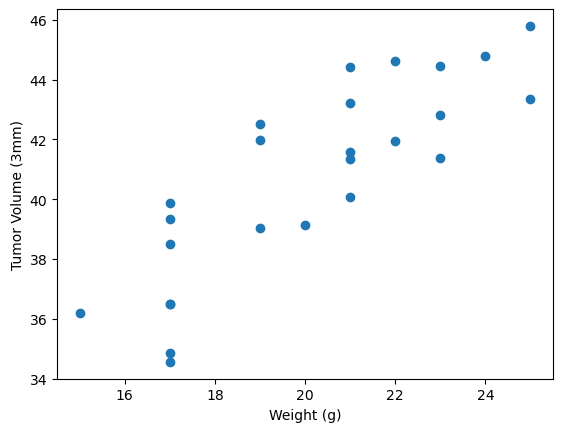

In [163]:
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (3mm)')

plt.scatter(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)'])
plt.show()

## Correlation and Regression

The Pearson Correlation Coefficient between mouse weight and average tumor volume is 0.84


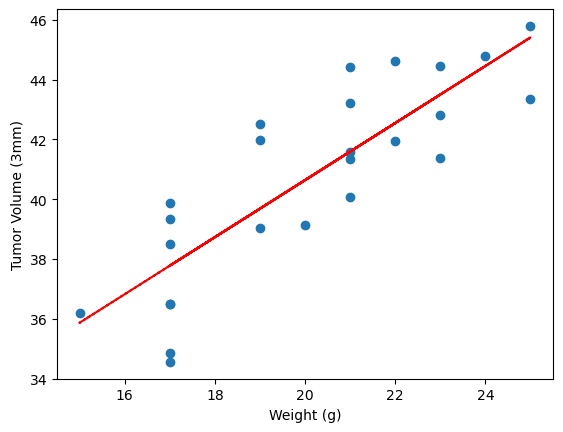

In [164]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mySlope, myInt, myR, myP, myStderr = st.linregress(scatter_data)
myFit = mySlope * scatter_weight + myInt
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (3mm)')

plt.scatter(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)'])
plt.plot(scatter_weight,myFit,"--", color='r')
print(f'The Pearson Correlation Coefficient between mouse weight and average tumor volume is {myR :.2f}' )
plt.show()